# Loan Predicition  
The idea behind this project is to build a model that will classify how much loan the user can take. It is based on the user’s marital status, education, number of dependents, and employments. We can build a linear model for this project.  
Dataset used here is from Kaggle : https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

## Import Dependencies

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
X_train = pd.read_csv(r'C:\Users\Vivek\Machine Learning\Machine Learning Projects\Loan-Prediction\train-data.csv')
X_test = pd.read_csv(r'C:\Users\Vivek\Machine Learning\Machine Learning Projects\Loan-Prediction\test-data.csv')

## Data Visualization and Anaysis

In [3]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
X_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print("X_train : {}".format(X_train.shape))
print("X_test : {}".format(X_test.shape))

X_train : (614, 13)
X_test : (367, 12)


In [6]:
X_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [7]:
X_train = X_train.drop(['Loan_ID'], axis = 1)
X_test = X_test.drop(['Loan_ID'], axis = 1)

In [8]:
r = X_train[X_train['Married'].isnull()].index.tolist()
X_train.drop(X_train.index[r])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
X_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [10]:
X_test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
dtype: int64

In [11]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<IPython.core.display.Javascript object>


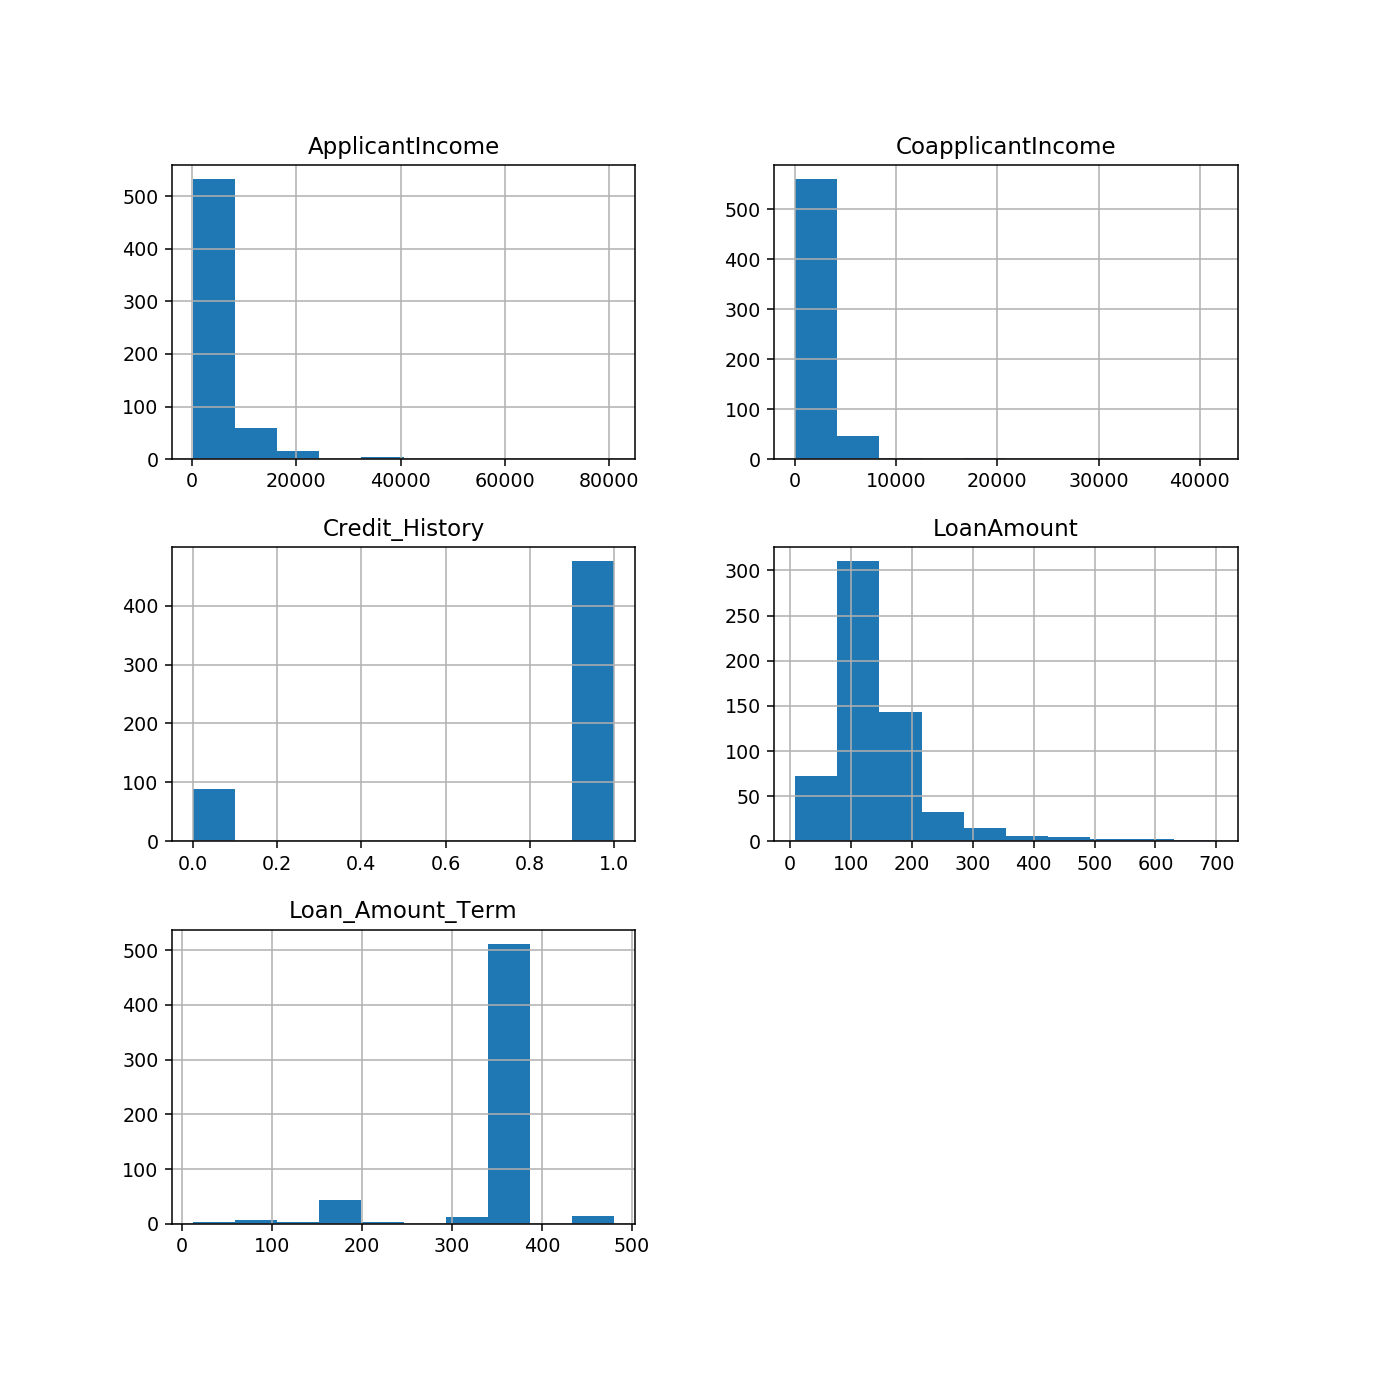

In [12]:
X_train.hist(figsize = (10,10))
plt.show()

## Get list of categorial variables

In [13]:
y = X_train.Loan_Status

X_train = X_train.drop(['Loan_Status'], axis=1)
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print('Categorial variables: {}'.format(object_cols))


Categorial variables: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [14]:
from sklearn.preprocessing import OneHotEncoder

## Remove categorial columns (will replace with one-hot encoding)

In [15]:
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

cat_X_train = X_train[object_cols]
cat_X_test = X_test[object_cols]

In [16]:
cat_X_train = cat_X_train.fillna(method = 'ffill')
cat_X_test = cat_X_test.fillna(method = 'ffill')

In [17]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()

imputed_num_X_train = pd.DataFrame(my_imputer.fit_transform(num_X_train))
imputed_num_X_test = pd.DataFrame(my_imputer.fit_transform(num_X_test))

## Imputation removed column names; put them back

In [18]:
imputed_num_X_train.columns = num_X_train.columns
imputed_num_X_test.columns = num_X_test.columns

In [19]:
from sklearn.preprocessing import LabelEncoder

## Make copy to avoid changing original data

In [20]:
label_X_train = X_train.copy()
label_X_test = X_test.copy()

## Apply label encoder to each column with categorial data

In [21]:
label_encoder = LabelEncoder()

for col in object_cols:
    cat_X_train[col] = label_encoder.fit_transform(cat_X_train[col])
    cat_X_test[col] = label_encoder.transform(cat_X_test[col])

In [22]:
cat_X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2


In [23]:
cat_X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,1,0,0,0,2
1,1,1,1,0,0,2
2,1,1,2,0,0,2
3,1,1,2,0,0,2
4,1,0,0,1,0,2


In [24]:
concat_X_train = pd.concat([imputed_num_X_train, cat_X_train], axis=1, sort=False)
concat_X_test = pd.concat([imputed_num_X_test, cat_X_test], axis=1, sort=False)

concat_X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849.0,0.0,146.412162,360.0,1.0,1,0,0,0,0,2
1,4583.0,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0
2,3000.0,0.0,66.000000,360.0,1.0,1,1,0,0,1,2
3,2583.0,2358.0,120.000000,360.0,1.0,1,1,0,1,0,2
4,6000.0,0.0,141.000000,360.0,1.0,1,0,0,0,0,2


In [25]:
y.isnull().any()

False

In [26]:
target = {'Y' : 1, 'N' : 0}
y_train = y.map(target)
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## Model Evaluation

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#print(models)

## Evaluate each model in turn

In [29]:
results = []
names = []


for name, model in models:
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    
    cv_results = cross_val_score(model, concat_X_train, y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.807721 (0.030446)
LDA: 0.809360 (0.032312)
KNN: 0.617266 (0.050453)
CART: 0.682311 (0.045326)
NB: 0.793046 (0.047072)
SVM: 0.690561 (0.009729)


## Compare Algorithms

<IPython.core.display.Javascript object>


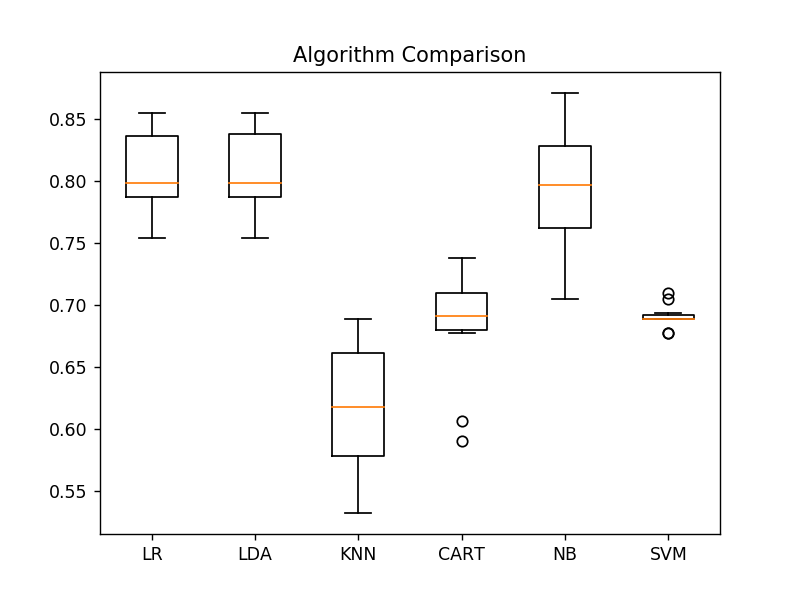

In [30]:
plt.figure()
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Make predictions on validation dataset

In [31]:
model = LinearDiscriminantAnalysis()
model.fit(concat_X_train, y_train)
predictions = model.predict(concat_X_test)